In [1]:
import pathlib
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt


import SessionTools.two_photon as st2p


%load_ext autoreload
%autoreload 2 

%matplotlib inline

In [4]:
date = "17_12_2025"
genotype_dir = "R20A02_R56H10_split_CsChrimsontdT_synaptopHluorinVAMP2/pilots"
fly = 'fly1'

sessions = ['baseline_opto_response-001',
            'baseline_opto_response-002',
            'post_perfusion_opto_response-003',
            'post_perfusion_opto_response-005',
            'post_OAperfusion_opto_response-006',
            'post_OAperfusion_opto_response-007']



In [5]:
pp_dict = {}
for session in sessions:
    outdir = pathlib.PurePath(f'/media/mplitt/SSD_storage/2P_scratch/{genotype_dir}/{date}/{fly}/{session}/preprocess.pkl')
    pp = st2p.preprocessing.EBImagingSession.from_file(outdir)
    pp_dict[session] = pp

In [22]:
def get_stims(pp):
    y_or = pp.calculate_zscored_F('outer_ring', exp_detrend=False,zscore=False)
    frame_times = np.array(pp.metadata['frame_times']).mean(axis=1)
    dt = (frame_times[1:]-frame_times[:-1]).mean()

    stim_times = [pp.metadata['mark_points']['initial_delay']]
    for i in range(pp.metadata['mark_points']['repetitions']-1):
        stim_times.append(pp.metadata['mark_points']['inter_point_delay']+pp.metadata['mark_points']['duration'])
    stim_times = np.array(stim_times)/1000
    stim_times = np.cumsum(stim_times)
    
    
    stim_inds = []
    for time in stim_times:
        stim_inds.append( np.argwhere((frame_times-time)>0)[0][0])
    stim_inds = np.array(stim_inds)
    print(stim_inds)
    
    stim_resp = np.zeros((len(stim_inds), 80))*np.nan
    print(stim_resp.shape)
    for i, ind in enumerate(stim_inds[:-1]):
        print(i)
        stim_resp[i,:] = y_or[-1,0,ind-10:ind+70]
        
    stim_resp -= np.nanmean(stim_resp[:,:10], axis=-1, keepdims=True)
    stim_resp[:,9:13] = np.nan
      # remove stim artifacts
    return frame_times, dt, stim_inds, stim_resp

[  41  123  206  288  370  452  535  617  699  781  864  946 1028 1110
 1193 1275 1357 1439 1522 1604]
(20, 80)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
[  41  123  206  288  370  452  535  617  699  781  864  946 1028 1110
 1193 1275 1357 1439 1522 1604]
(20, 80)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
[  41  123  206  288  370  452  535  617  699  781  864  946 1028 1110
 1193 1275 1357 1439 1522 1604]
(20, 80)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
[  41  123  206  288  370  452  535  617  699  781  864  946 1028 1110
 1193 1275 1357 1439 1522 1604]
(20, 80)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
[  41  123  206  288  370  452  535  617  699  781  864  946 1028 1110
 1193 1275 1357 1439 1522 1604]
(20, 80)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
[  41  123  206  288  370  452  535  617  699  781  864  946 1028 1110
 1193 1275 1357 1439 1522 1604]
(20, 80)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


/tmp/ipykernel_2375408/4089462347.py:25: RuntimeWarning: Mean of empty slice
  stim_resp -= np.nanmean(stim_resp[:,:10], axis=-1, keepdims=True)
/tmp/ipykernel_2375408/3166054570.py:5: RuntimeWarning: Mean of empty slice
  mu = np.nanmean(stim_resp[:,:],axis=0)
/tmp/ipykernel_2375408/3166054570.py:6: SmallSampleWarning: After omitting NaNs, one or more axis-slices of one or more sample arguments is too small; corresponding elements of returned arrays will be NaN. See documentation for sample size requirements.
  sem = sp.stats.sem(stim_resp,axis=0, nan_policy='omit')
/tmp/ipykernel_2375408/4089462347.py:25: RuntimeWarning: Mean of empty slice
  stim_resp -= np.nanmean(stim_resp[:,:10], axis=-1, keepdims=True)
/tmp/ipykernel_2375408/3166054570.py:5: RuntimeWarning: Mean of empty slice
  mu = np.nanmean(stim_resp[:,:],axis=0)
/tmp/ipykernel_2375408/3166054570.py:6: SmallSampleWarning: After omitting NaNs, one or more axis-slices of one or more sample arguments is too small; corresponding

Text(0, 0.5, 'dF/F')

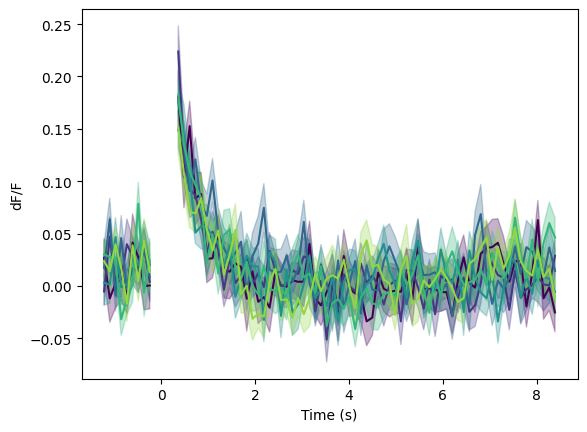

In [24]:
fig, ax= plt.subplots()
N = len(sessions)
for i, sess in enumerate(sessions):
    frame_times, dt, stim_inds, stim_resp = get_stims(pp_dict[sess])
    mu = np.nanmean(stim_resp[:,:],axis=0)
    sem = sp.stats.sem(stim_resp,axis=0, nan_policy='omit')

    x = np.arange(-10*dt, 69*dt+1E-3, dt) 
    ax.plot(x, mu, color=plt.cm.viridis(i/N))
    ax.fill_between(x, mu-sem, mu+sem, color=plt.cm.viridis(i/N), alpha=.3)
    
ax.set_xlabel('Time (s)')
ax.set_ylabel('dF/F')
